# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/annagirerd/labs/refs/heads/main/04_hedonic_pricing/airbnb_hw.csv"

# Load the data from GitHub
df = pd.read_csv(url)

# View the first few rows
print(df.head())


    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

In [4]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [5]:
df = df.dropna(subset=['Price'])


In [6]:
df['Beds'] = df['Beds'].fillna(df['Beds'].median())

In [7]:
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())

In [9]:
df = df.dropna(subset=['Property Type'])


In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 30294 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30294 non-null  int64  
 1   Host Since                  30291 non-null  object 
 2   Name                        30294 non-null  object 
 3   Neighbourhood               30294 non-null  object 
 4   Property Type               30294 non-null  object 
 5   Review Scores Rating (bin)  22102 non-null  float64
 6   Room Type                   30294 non-null  object 
 7   Zipcode                     30160 non-null  float64
 8   Beds                        30294 non-null  float64
 9   Number of Records           30294 non-null  int64  
 10  Number Of Reviews           30294 non-null  int64  
 11  Price                       30294 non-null  float64
 12  Review Scores Rating        30294 non-null  float64
dtypes: float64(5), int64(3), object(5)
m

Text(0.5, 1.0, 'Distribution of Price')

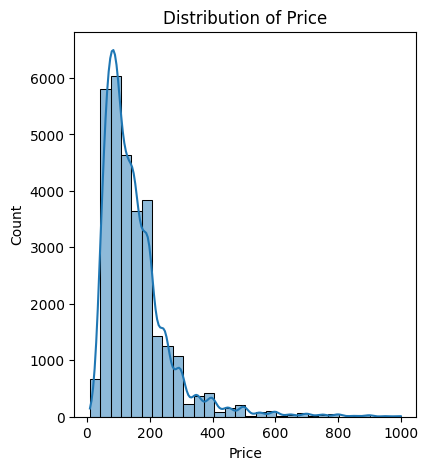

In [14]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')


skew right

Text(0.5, 1.0, 'Distribution of Beds')

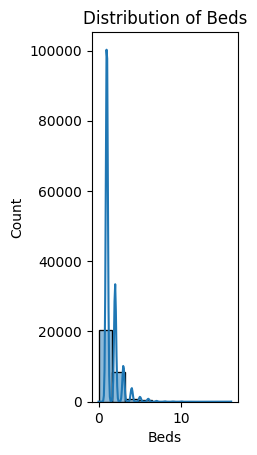

In [16]:

plt.subplot(1, 3, 2)
sns.histplot(df['Beds'], kde=True, bins=10)
plt.title('Distribution of Beds')


Heavy skew right

Text(0.5, 1.0, 'Distribution of Review Scores Rating')

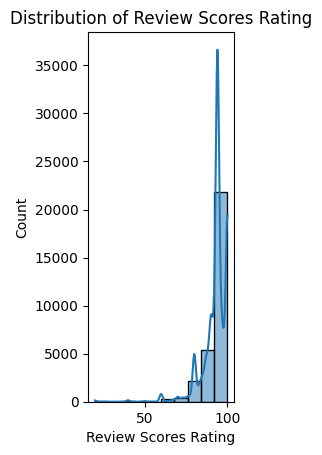

In [17]:

plt.subplot(1, 3, 3)
sns.histplot(df['Review Scores Rating'], kde=True, bins=10)
plt.title('Distribution of Review Scores Rating')


Skew left

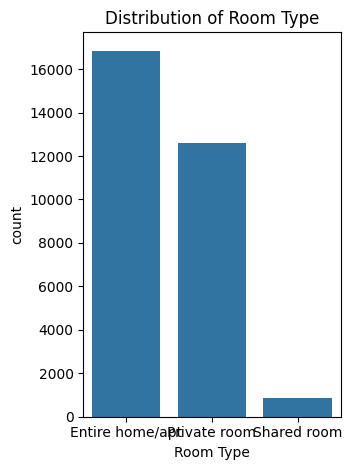

In [20]:

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Room Type')
plt.title('Distribution of Room Type')

plt.tight_layout()
plt.show()

mostly entire home

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
